<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/01%20Programaci%C3%B3n%20en%20Python/notebooks/exercises/Practica4_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### __Data set de vinos del mundo__

Esta es una versi√≥n reducida de la base de datos [winemag-data](https://gist.github.com/clairehq/79acab35be50eaf1c383948ed3fd1129), que contiene una rese√±a en ingl√©s sobre una gran cantidad de vinos del mundo.

### __Descripci√≥n de los campos__

 - **country**: El pa√≠s de donde proviene el vino
 - **description** : Algunas frases de un sommelier que describen el sabor, olor, apariencia, sensaci√≥n, etc. del vino.
 - **designation**: La denominaci√≥n. El vi√±edo dentro de la bodega de donde proceden las uvas que elaboraron el vino.
 - **points**: la cantidad de puntos que WineEnthusiast calific√≥ al vino en una escala del 1 al 100 (aunque dicen que solo publican rese√±as de vinos con una puntuaci√≥n> = 80).
 - **price**: El costo de una botella de vino.
 - **province**: La provincia o estado de donde proviene el vino
 - **region_1**: el √°rea de cultivo de vino en una provincia o estado (es decir, Napa)
 - **region_2**: a veces hay regiones m√°s espec√≠ficas, especificadas dentro de un √°rea de cultivo del vino (es decir, Rutherford dentro del Valle de Napa), pero este valor a veces puede estar en blanco.
 - **taster_name**: nombre de la persona que prob√≥ y revis√≥ el vino.
 - **taster_twitter_handle**: identificador de Twitter para la persona que prob√≥ y revis√≥ el vino.
 - **title**: el t√≠tulo de la rese√±a de vinos, que a menudo contiene la cosecha si est√° interesado en extraer esa caracter√≠stica.
 - **variety**: la variedad: el tipo de uva utilizada para elaborar el vino (es decir, Pinot Noir).
 - **winery**: la bodega que hizo el vino.

### TEST

In [2]:
# Fetch the dataset using the raw GitHub URL.
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://raw.githubusercontent.com/DCDPUAEM/DCDP/main/01%20Programaci%C3%B3n%20en%20Python/data/winemag-data-less.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 23.2M  100 23.2M    0     0  48.7M      0 --:--:-- --:--:-- --:--:-- 48.7M


In [3]:
# leemos el dataframe usando read_csv
df = pd.read_csv("winemag-data-less.csv")
print(df.info())
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59995 entries, 0 to 59994
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             59995 non-null  int64  
 1   country                59964 non-null  object 
 2   description            59995 non-null  object 
 3   designation            42728 non-null  object 
 4   points                 59995 non-null  int64  
 5   price                  55750 non-null  float64
 6   province               59964 non-null  object 
 7   region_1               50163 non-null  object 
 8   region_2               23068 non-null  object 
 9   taster_name            47586 non-null  object 
 10  taster_twitter_handle  45381 non-null  object 
 11  title                  59995 non-null  object 
 12  variety                59995 non-null  object 
 13  winery                 59995 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 6.4+

Unnamed: 0   country                                        description  \
0           0     Italy  Aromas include tropical fruit, broom, brimston...   
1           1  Portugal  This is ripe and fruity, a wine that is smooth...   
2           2        US  Tart and snappy, the flavors of lime flesh and...   

    designation  points  price           province           region_1  \
0  Vulk√† Bianco      87    NaN  Sicily & Sardinia               Etna   
1      Avidagos      87   15.0              Douro                NaN   
2           NaN      87   14.0             Oregon  Willamette Valley   

            region_2    taster_name taster_twitter_handle  \
0                NaN  Kerin O‚ÄôKeefe          @kerinokeefe   
1                NaN     Roger Voss            @vossroger   
2  Willamette Valley   Paul Gregutt           @paulgwine¬†   

                                           title         variety  \
0              Nicosia 2013 Vulk√† Bianco  (Etna)     White Blend   
1  Quinta dos Avidagos 2011 Avidagos Red (Douro)  Portuguese Red   
2  Rainstorm 2013 Pinot Gris (Willamette Valley)      Pinot Gris   

                winery  
0              Nicosia  
1  Quinta dos Avidagos  
2            Rainstorm

In [4]:
#Tiremos la columna Unnamed
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head(3)

country                                        description   designation  \
0     Italy  Aromas include tropical fruit, broom, brimston...  Vulk√† Bianco   
1  Portugal  This is ripe and fruity, a wine that is smooth...      Avidagos   
2        US  Tart and snappy, the flavors of lime flesh and...           NaN   

   points  price           province           region_1           region_2  \
0      87    NaN  Sicily & Sardinia               Etna                NaN   
1      87   15.0              Douro                NaN                NaN   
2      87   14.0             Oregon  Willamette Valley  Willamette Valley   

     taster_name taster_twitter_handle  \
0  Kerin O‚ÄôKeefe          @kerinokeefe   
1     Roger Voss            @vossroger   
2   Paul Gregutt           @paulgwine¬†   

                                           title         variety  \
0              Nicosia 2013 Vulk√† Bianco  (Etna)     White Blend   
1  Quinta dos Avidagos 2011 Avidagos Red (Douro)  Portuguese Red   
2  Rainstorm 2013 Pinot Gris (Willamette Valley)      Pinot Gris   

                winery  
0              Nicosia  
1  Quinta dos Avidagos  
2            Rainstorm

### __Veamos cuantas rese√±as de vinos mexicanos tenemos.__

#### &#9758; Construye una nueva Tabla con las rese√±as de vinos mexicanos.
- Qu√©date **s√≥lo** con las siguientes columnas: `['country','winery','variety','description','points','price']`
- Haz que el √≠ndice se reinicie en 0.
- Guarda este DataFrame en la variable vinosMX.

In [5]:
"""
SECUENCIA:
1. Ubicar todos los registros de M√©xico usando indexaci√≥n booleana
2. De este DataFrame resultante, extraer solamente las columnas solicitadas.
3. Reiniciar el √≠ndice usando reset_index()
4. Tirar (drop) la nueva columna index
5. Asignar el resultado de este proceso a la variable vinosMX
"""
# TU CODIGO
# 1. Ubicar todos los registros de M√©xico usando indexaci√≥n booleana
vinosMX = df[df['country']=='Mexico']

# 2. De este DataFrame resultante, extraer solamente las columnas solicitadas.
vinosMX = vinosMX[['country','winery','variety','description','points','price']]

# 3. Reiniciar el √≠ndice usando reset_index()
vinosMX = vinosMX.reset_index(drop=True)

vinosMX

country                                 winery  \
0   Mexico                             L.A. Cetto   
1   Mexico                            Monte Xanic   
2   Mexico                             L.A. Cetto   
3   Mexico                            Cava Aragon   
4   Mexico                             L.A. Cetto   
5   Mexico                     Hacienda La Lomita   
6   Mexico                            Monte Xanic   
7   Mexico                            Tres Valles   
8   Mexico  Uni√≥n de Productores del Valle (UPVG)   
9   Mexico                            Monte Xanic   
10  Mexico                   Vinicola Fraternidad   
11  Mexico                           Vinos Magbel   
12  Mexico                                M√∂ebius   
13  Mexico                        Vinicola Urbana   
14  Mexico                              Vena Cava   
15  Mexico                            Monte Xanic   
16  Mexico                         Vi√±as de Garza   
17  Mexico                             L.A. Cetto   
18  Mexico                             Vinisterra   
19  Mexico                            Cava Maciel   
20  Mexico                             L.A. Cetto   
21  Mexico                             L.A. Cetto   
22  Mexico                    Rinc√≥n de Guadalupe   
23  Mexico                              Vena Cava   
24  Mexico                            Tres Valles   
25  Mexico                         Vi√±as de Garza   
26  Mexico                             L.A. Cetto   
27  Mexico                     Hacienda La Lomita   
28  Mexico                              La Lomita   
29  Mexico                            Monte Xanic   

                         variety  \
0                       Nebbiolo   
1                Sauvignon Blanc   
2             Cabernet Sauvignon   
3                       Nebbiolo   
4                   Petite Sirah   
5                           Ros√©   
6                 Cabernet Franc   
7                Sauvignon Blanc   
8                      Red Blend   
9                      Red Blend   
10                          Ros√©   
11                        Merlot   
12                      Muscatel   
13                     Red Blend   
14                     Red Blend   
15               Sauvignon Blanc   
16                     Red Blend   
17                    Chardonnay   
18                     Red Blend   
19                    Chardonnay   
20                      Nebbiolo   
21                      Nebbiolo   
22                     Red Blend   
23            Cabernet Sauvignon   
24                     Red Blend   
25                     Red Blend   
26                    Chardonnay   
27  Sauvignon Blanc-Chenin Blanc   
28      Bordeaux-style Red Blend   
29     Cabernet Sauvignon-Merlot   

                                          description  points  price  
0   The color is appropriately light, the aromas a...      88   18.0  
1   Sauvignon Blanc is, in general, one of Baja's ...      87   15.0  
2   Aromas of mature Cabernet: cassis, tobacco lea...      87   18.0  
3   While this is fiery on the nose, you also get ...      88   27.0  
4   Dark and earthy, slightly pruny and alcoholic,...      83    8.0  
5   Oxidized cherry and strawberry aromas settle o...      83   21.0  
6   With aromas of salsa, chili peppers and tomato...      86   39.0  
7   Mild hints of tropical fruit are less than con...      84   15.0  
8   This odd blend of Barbera, Cabernet Sauvignon,...      83   22.0  
9   This Cabernet blend is one of Baja's best reds...      90   56.0  
10  This is fairly hard and fiery on the nose. The...      82   25.0  
11  Fiery, punchy aromas of red berries and herbac...      82   30.0  
12  Tropical aromas of lychee and green banana are...      87   19.0  
13  This blend of Tempranillo and Grenache is grit...      87   33.0  
14  This five-grape blend is heavy, oaky and green...      84   27.0  
15  Here's a true Sauvignon Blanc with spunky gree...      86   13.0  
16  The bouquet on this blen

### __Veamos cuantas rese√±as de vinos por pa√≠s tenemos.__

#### &#9758; Muestra en una gr√°fica de barras la distribuci√≥n del n√∫mero de rese√±as por pa√≠s (_top 10_).

#### Puedes auxiliarte con alguna de estos m√©todos de Pandas:
 - [pandas.DataFrame.count](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.count.html)
 - [pandas.Series.value_counts](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)
 - [pandas.Series.index](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.index.html)
 - [pandas.Series.values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.values.html)

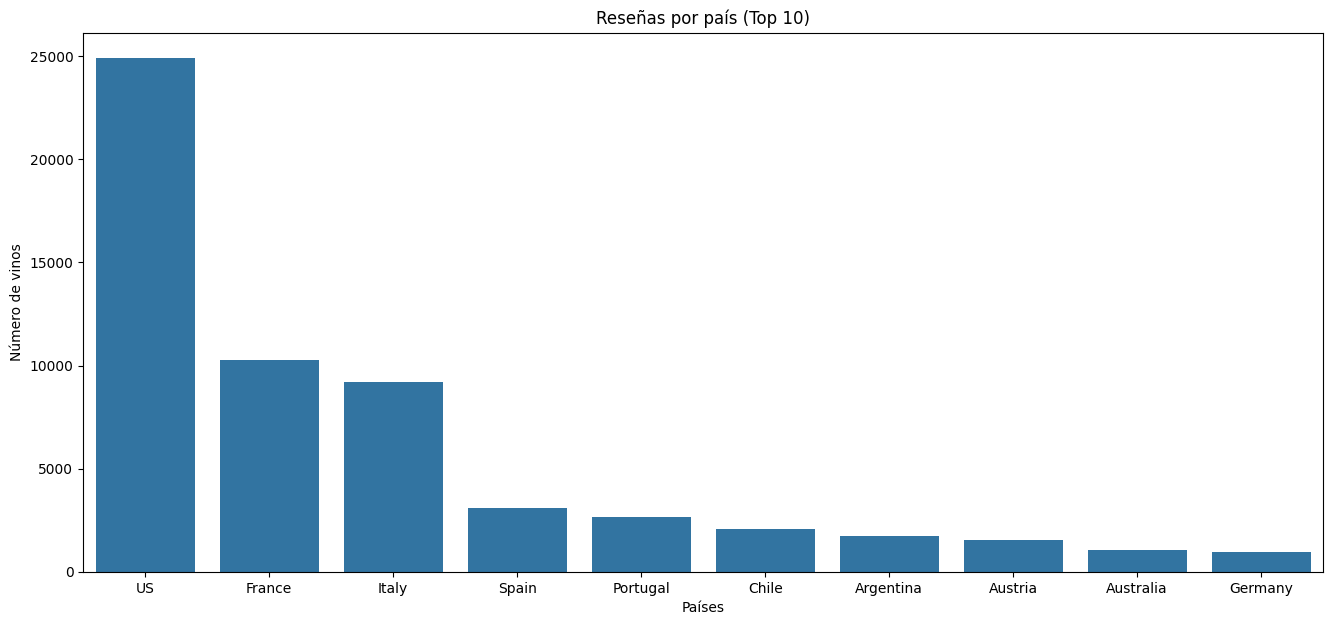

In [6]:
"""
SECUENCIA:
1. Ubicar el nombre de la columna de pa√≠s
2. Sobre esta columna, obtener la Serie correspondiente
3. Hacer un conteo de los valores √∫nicos sobre esta Serie
4. X en la gr√°fica de barras son los pa√≠ses (√≠ndice de la Serie)
5. Y en la gr√°fica de barras son los conteos por pa√≠s (values de la Serie)
6. Usar Seaborn para graficar el diagrama de barras
7. Rotular la gr√°fica y los ejes
"""
# 1. Ubicar el nombre de la columna de pa√≠s
# 2. Sobre esta columna, obtener la Serie correspondiente
# 3. Hacer un conteo de los valores √∫nicos sobre esta Serie
conteos=df['country'].value_counts()

# 4. X en la gr√°fica de barras son los pa√≠ses (√≠ndice de la Serie)
# 5. Y en la gr√°fica de barras son los conteos por pa√≠s (values de la Serie)
x = conteos.index[:10]
y = conteos.values[:10]

plt.figure(figsize=(16,7))
sns.barplot(x=x[:10], y=y[:10])

# En una sola l√≠nea:
#sns.barplot(df.country.value_counts().index[:10], df.country.value_counts().values[:10])

plt.xlabel("Pa√≠ses")
plt.ylabel("N√∫mero de vinos")
plt.title("Rese√±as por pa√≠s (Top 10)")

plt.show()

### __Veamos ahora cu√°l es el precio promedio por cada pa√≠s.__

#### &#9758; Muestra en una gr√°fica de barras el precio promedio por pa√≠s, en orden descendente (_top 10_).

Puedes consultar:
 - [pandas.DataFrame.groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)



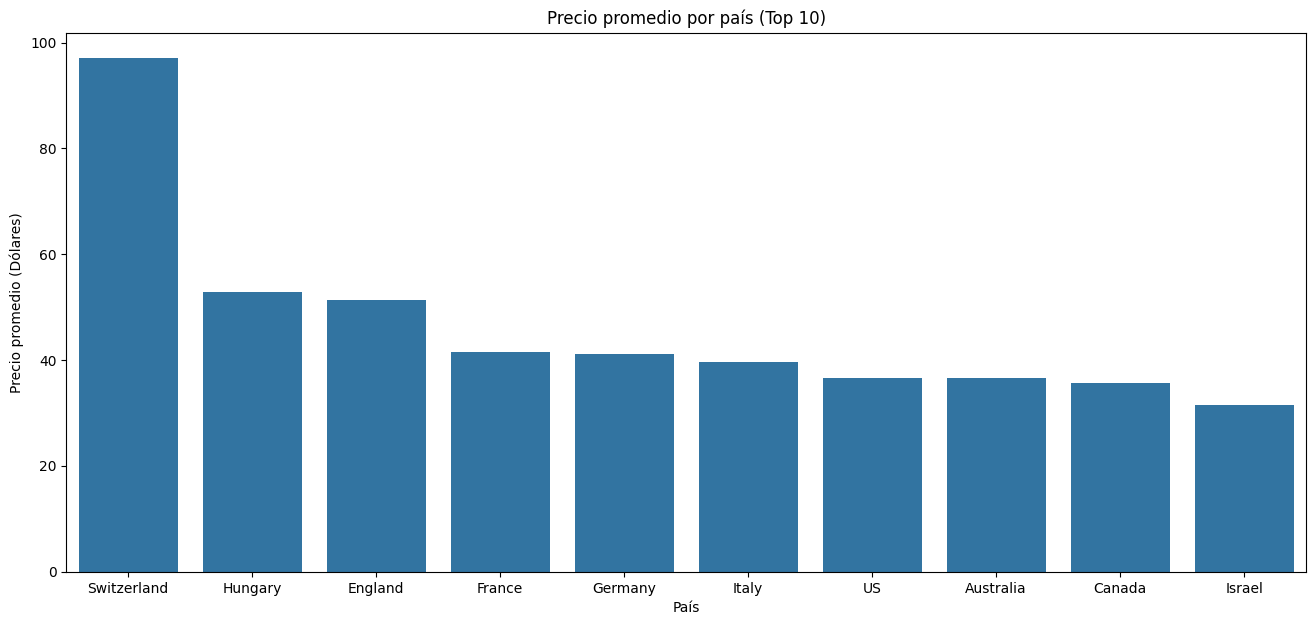

In [24]:
"""
SECUENCIA:
1. Agrupar el DataFrame df por la columna ‚Äòcountry‚Äô.
2. Calcular el precio promedio para cada grupo usando la funci√≥n mean() en la columna ‚Äòprice‚Äô.
3. Ordenar los resultados en orden descendente para obtener los precios promedios m√°s altos primero.
4. Seleccionar los primeros 10 pa√≠ses con el precio promedio m√°s alto.
5. Crear una gr√°fica de barras con Seaborn para visualizar estos datos.
"""

# 1. Agrupar por pa√≠s y 2. calcular el precio promedio
promedios = df.groupby('country')['price'].mean()

# 3. Ordenar los resultados en orden descendente
promedios_ordenados = promedios.sort_values(ascending=False)

# 4. Seleccionar los primeros 10 pa√≠ses
top_10_promedios = promedios_ordenados[:10]

# 5. Crear la gr√°fica de barras con Seaborn
plt.figure(figsize=(16,7))
sns.barplot(x=top_10_promedios.index, y=top_10_promedios.values)

plt.xlabel("Pa√≠s")
plt.ylabel("Precio promedio (D√≥lares)")
plt.title("Precio promedio por pa√≠s (Top 10)")

plt.show()


#### &#9758; ¬øCu√°l ser√≠a el precio promedio por variedad?

üôÇ __Escribe la secuencia de pasos que tendr√≠as que realizar.__

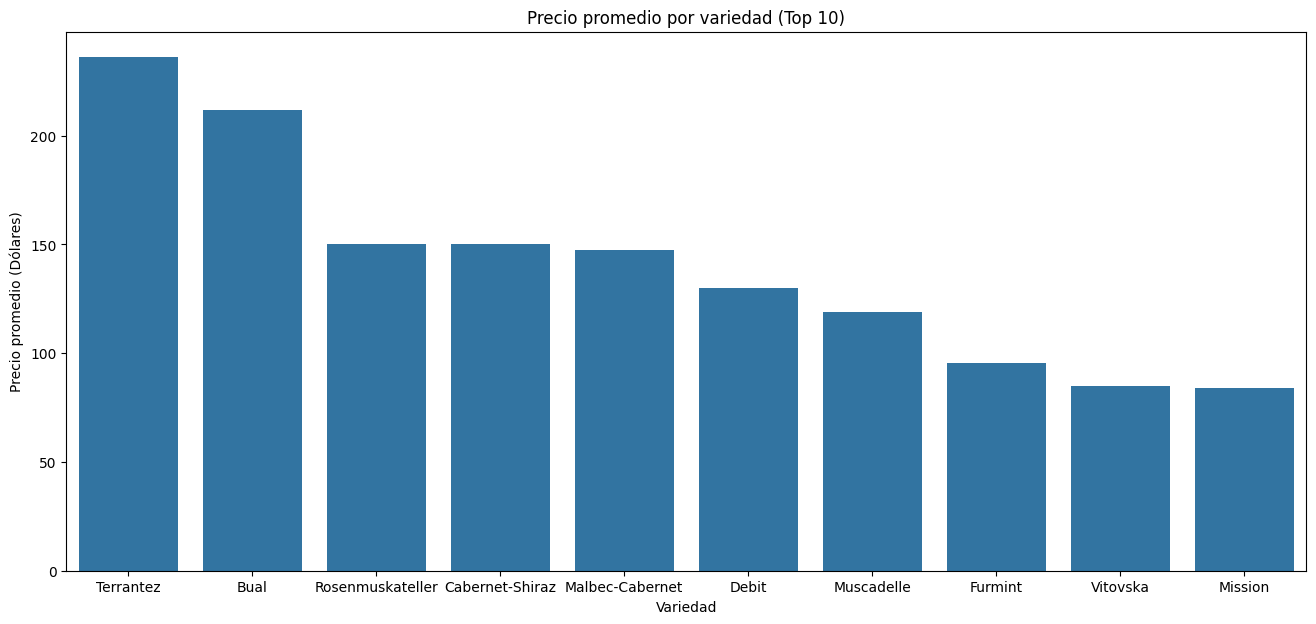

In [13]:
"""
SECUENCIA:
1. Agrupar el DataFrame df por la columna ‚Äòvariety‚Äô.
2. Calcular el precio promedio para cada grupo.
3. Ordenar los resultados en orden descendente.
4. Seleccionar un n√∫mero espec√≠fico de variedades para visualizar.
5. Crear la gr√°fica de barras con Seaborn
"""

# 1. Agrupar por variedad y 2. calcular el precio promedio
promedios_variedad = df.groupby('variety')['price'].mean()

# 3. Ordenar los resultados en orden descendente
promedios_variedad_ordenados = promedios_variedad.sort_values(ascending=False)

# 4. Seleccionar un n√∫mero espec√≠fico de variedades para visualizar
top_variedades_promedios = promedios_variedad_ordenados[:10]

# 5. Crear la gr√°fica de barras con Seaborn
plt.figure(figsize=(16,7))
sns.barplot(x=top_variedades_promedios.index, y=top_variedades_promedios.values)

plt.xlabel("Variedad")
plt.ylabel("Precio promedio (D√≥lares)")
plt.title("Precio promedio por variedad (Top 10)")

plt.show()

#### Agregando anotaciones a nuestros gr√°ficos

Es posible agregar informaci√≥n a nuestros gr√°ficos, en forma de texto, o dibujos (e.g. flechas, l√≠neas, c√≠rculos, etc.). Para ello, se utiliza la anotaci√≥n (annotate) de ejes (axes). Detallar aqu√≠ c√≥mo funciona nos llevar√≠a mucho tiempo. Puedes consultar la documentaci√≥n en estas ligas:

- [matplotlib.Artist](https://matplotlib.org/3.3.3/api/artist_api.html#matplotlib.artist.Artist)
    - [Artist tutorial](https://matplotlib.org/3.3.3/tutorials/intermediate/artists.html)
- [matplotlib.axes](https://matplotlib.org/3.3.3/api/axes_api.html#matplotlib.axes.Axes)
- [matplotlib.patches.Patch](https://matplotlib.org/3.3.3/api/axes_api.html#matplotlib.axes.Axes)
- [matplotlib.patches.Rectangle](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.patches.Rectangle.html)
- [matplotlib.pyplot.annotate](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.annotate.html)

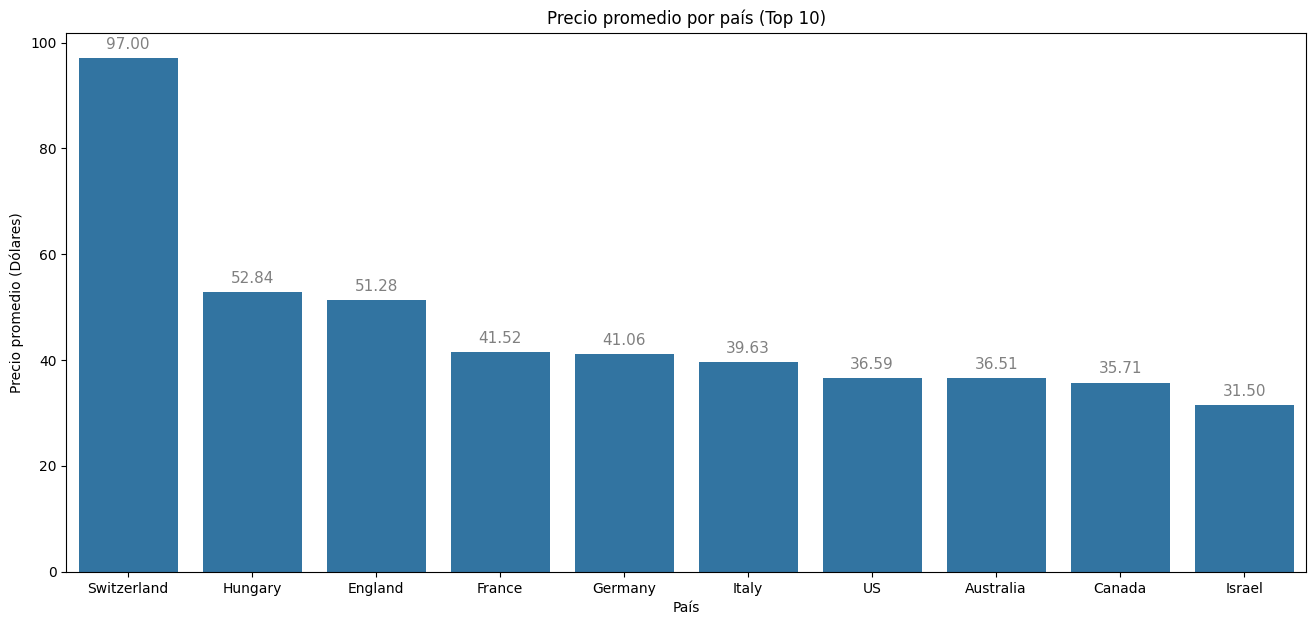

In [26]:
#Definimos el tama√±o del canvas
plt.figure(figsize=(16,7))

# la variable "ax" (axes) contiene la informaci√≥n  del gr√°fico de barras.
# En particular, contiene todo lo relativo a los parches (rect√°ngulos) del barplot.
ax = sns.barplot(x=top_10_promedios.index, y=top_10_promedios.values)

plt.xlabel("Pa√≠s")
plt.ylabel("Precio promedio (D√≥lares)")
plt.title("Precio promedio por pa√≠s (Top 10)")

# Recorremos cada rect√°ngulo
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(),\
                (p.get_x() + p.get_width() / 2., p.get_height()),\
                ha='center', va='center', fontsize=11, color='gray',\
                xytext=(0, 10),\
                textcoords='offset points')

plt.show()

### __Ahora queremos darnos una idea de cu√°les podr√≠an ser los pa√≠ses cuyos vinos tienen una mejor raz√≥n calidad-precio en promedio.__

#### &#9758; Muestra en una gr√°fica de barras la raz√≥n puntos/precio promedio por pa√≠s, en orden descendente (_top 10_). Muestra los valores de la raz√≥n sobre cada barra.

‚úã __Recuerda que si divides entre 0 o Nan obtendr√°s inf o nan__

üôÇ __Escribe la secuencia de pasos que tendr√≠as que realizar.__

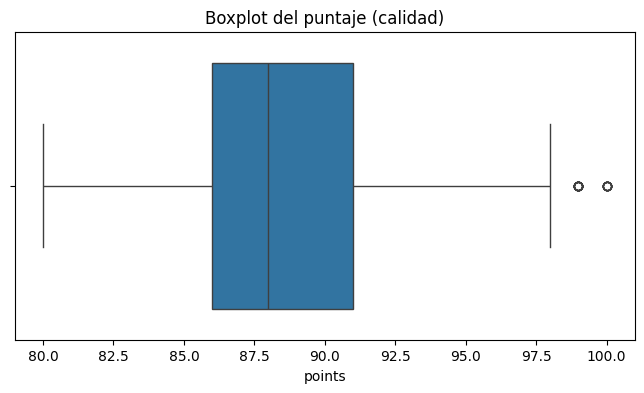

In [14]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df.points)
plt.title("Boxplot del puntaje (calidad)")
plt.show()

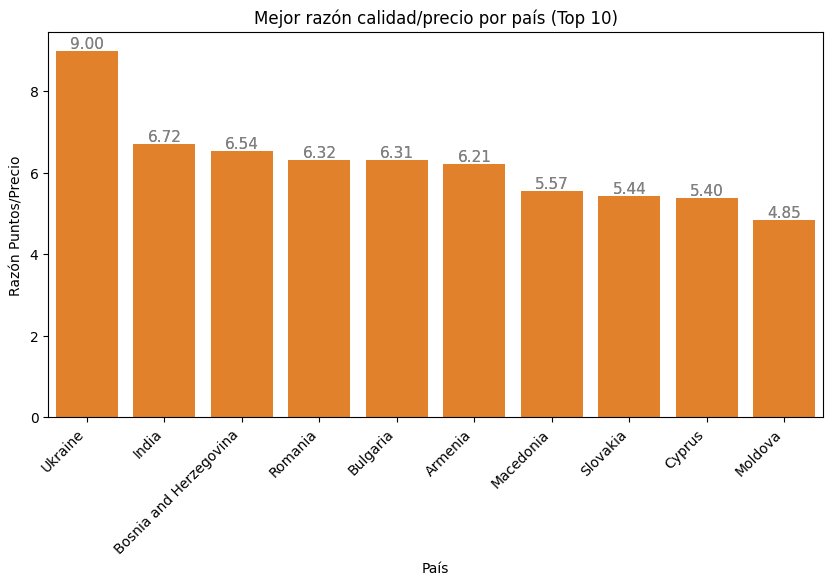

In [19]:
"""
SECUENCIA:
Agrupar el DataFrame df por la columna ‚Äòcountry‚Äô.
Calcular la raz√≥n puntos/precio promedio para cada grupo.
Ordenar los resultados en orden descendente.
Seleccionar los primeros 10 pa√≠ses con la raz√≥n m√°s alta.
Crear la gr√°fica de barras con Seaborn para visualizar estos datos.
"""

### TU CODIGO AQUI ##
# Agrupar el DataFrame df por la columna 'country'
promedios = df.groupby('country')

#Calcular la raz√≥n puntos/precio promedio para cada grupo.
points_avg = promedios['points'].mean()
price_avg = promedios['price'].mean()

#Calcula la raz√≥n calidad-precio dividiendo la puntuaci√≥n promedio por el precio promedio
ratio = (points_avg / price_avg).replace([np.inf, -np.inf], np.nan).dropna()

# Ordenar los resultados en orden descendente.
sorted_ratio = ratio.sort_values(ascending=False)

# Seleccionar los primeros 10 pa√≠ses con la raz√≥n m√°s alta.
top_10_ratio = sorted_ratio[:10]
#####################

plt.figure(figsize=(10,5))
ax = sns.barplot(x=top_10_ratio.index, y=top_10_ratio.values)
sns.barplot(x=top_10_ratio.index, y=top_10_ratio.values)

plt.title("Mejor raz√≥n calidad/precio por pa√≠s (Top 10)")
plt.xlabel("Pa√≠s")
plt.xticks(rotation= 45, ha="right")
plt.ylabel("Raz√≥n Puntos/Precio")

for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 5),
                 textcoords='offset points')
plt.show()

### __¬øQu√© vinos tienen la mejor puntuaci√≥n y a qu√© pa√≠ses pertenecen?__

#### &#9758; Muestra en una gr√°fica de pastel la proporci√≥n de los pa√≠ses que tienen los 20 mejores vinos; es decir, los primeros 20 de mayor puntaje.  

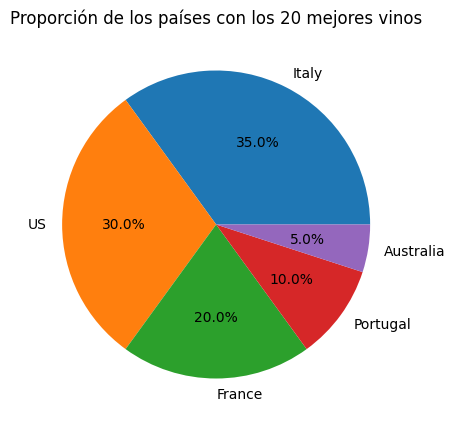

In [20]:
# 1. Ordenar el DataFrame por 'points' en orden descendente
sorted_df = df.sort_values(by='points', ascending=False)

# 2. Seleccionar los primeros 20 vinos
top_20_wines = sorted_df[:20]

# 3. Contar la frecuencia de cada pa√≠s
country_counts = top_20_wines['country'].value_counts()

# 4. Crear la gr√°fica de pastel
plt.figure(figsize=(10,5))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%')
plt.title("Proporci√≥n de los pa√≠ses con los 20 mejores vinos")
plt.show()

### __¬øCu√°les son las 10 variedades de uva m√°s abundantes y en qu√© proporci√≥n?__

#### &#9758; Da una soluci√≥n utilizando s√≥lo dos l√≠neas de c√≥digo

In [29]:
#TU CODIGO
variedades = df['variety'].value_counts(normalize=True)[:10]
print(variedades)

variety
Pinot Noir                  0.101608
Chardonnay                  0.089057
Cabernet Sauvignon          0.072556
Red Blend                   0.069656
Bordeaux-style Red Blend    0.052738
Riesling                    0.040103
Sauvignon Blanc             0.039070
Syrah                       0.031669
Ros√©                        0.026502
Merlot                      0.023535
Name: proportion, dtype: float64


### __¬øCu√°les son las 20 bodegas m√°s mencionadas y en qu√© proporci√≥n?__

#### &#9758; Da una soluci√≥n utilizando s√≥lo dos l√≠neas de c√≥digo

In [30]:
#TU CODIGO
bodegas = df['winery'].value_counts(normalize=True)[:20]
print(bodegas)

winery
Georges Duboeuf               0.001817
Wines & Winemakers            0.001783
Testarossa                    0.001617
Louis Latour                  0.001450
Chateau Ste. Michelle         0.001433
Williams Selyem               0.001433
DFJ Vinhos                    0.001433
Concha y Toro                 0.001300
Gary Farrell                  0.001233
Lynmar                        0.001200
Kendall-Jackson               0.001133
Robert Mondavi                0.001083
Columbia Crest                0.000950
Trapiche                      0.000950
Undurraga                     0.000933
Siduri                        0.000917
Albert Bichot                 0.000917
Jean-Luc and Paul Aegerter    0.000883
Casa Santos Lima              0.000883
Rodney Strong                 0.000883
Name: proportion, dtype: float64


### __Vamos ahora a construir una nueva tabla de informaci√≥n__

#### &#9758; Construye una tabla que muestre pa√≠s, variedad de uva, bodega, y valores de puntuaci√≥n y precio.
- Considera las 10 variedades de uva y las 20 bodegas m√°s importantes.
- Haz una tabla con estos datos y s√≥lo los valores de pa√≠s, bodega, variedad, puntuaci√≥n y precio correspondientes.
- Agrega una columna con el valor de puntos/precio
- Cambia el nombre de la bodega para que √©ste incluya su pa√≠s de origen.
- Ordena los datos por nombre de pa√≠s, variedad y bodega (orden ascendente).

In [38]:
#TU CODIGO

# Filtra las 10 variedades de uva y las 20 bodegas m√°s importantes.
top_variedades = df['variety'].value_counts(normalize=True)[:10].index
top_bodegas = df['winery'].value_counts(normalize=True)[:20].index

# Crea una nueva tabla con los datos filtrados.
p_v = df[(df['variety'].isin(top_variedades)) & (df['winery'].isin(top_bodegas))].copy()

# Agrega la columna de puntos/precio.
p_v.loc[:, 'points_price_ratio'] = p_v['points'] / p_v['price']

# Cambia el nombre de la bodega para incluir el pa√≠s de origen.
p_v.loc[:, 'winery'] = p_v['country'] + " - " + p_v['winery']

# Ordena los datos.
p_v.sort_values(by=['country', 'variety', 'winery'], ascending=True, inplace=True)

#### &#9758; Observa la relaci√≥n puntos-precio por pa√≠s

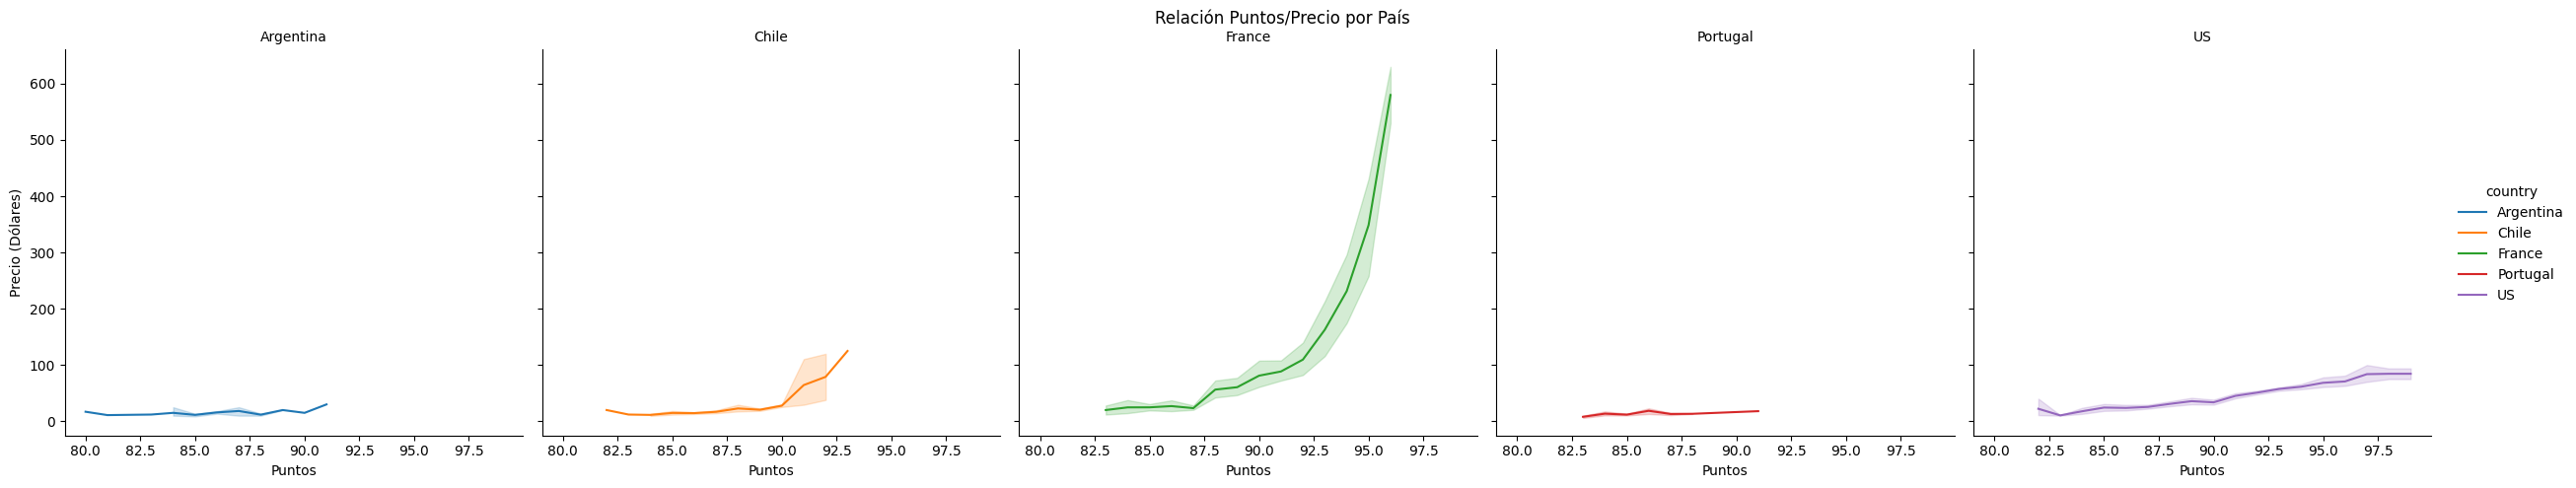

In [81]:
g = sns.relplot(x="points", y="price", hue="country", col='country',kind="line", data=p_v)
g.set_titles("{col_name}")
g.set_axis_labels("Puntos", "Precio (D√≥lares)")

plt.subplots_adjust(top=0.9)
plt.suptitle("Relaci√≥n Puntos/Precio por Pa√≠s")

plt.show()

#### &#9758; Observa las distribuciones por pares en funci√≥n de la variedad de uva.

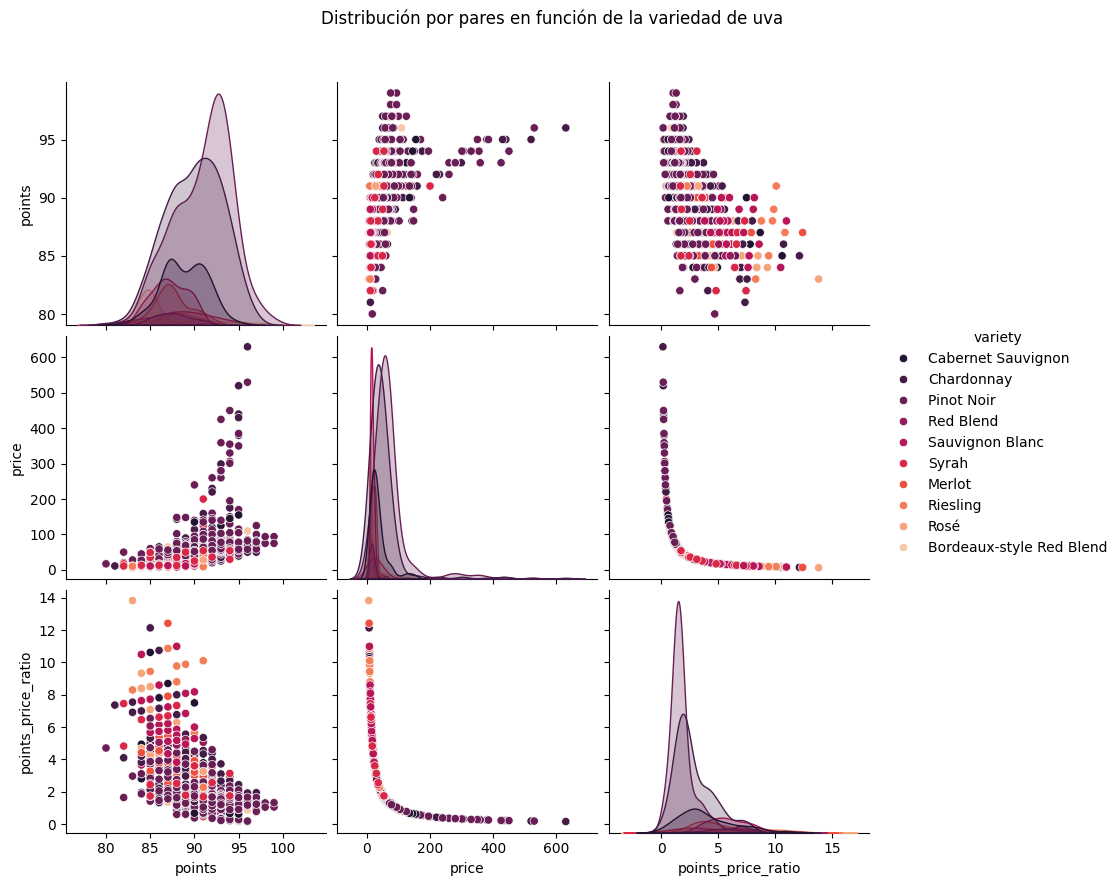

In [82]:
#TU CODIGO
sns.pairplot(p_v, hue="variety", height=3, palette='rocket')
plt.subplots_adjust(top=0.9)
plt.suptitle("Distribuci√≥n por pares en funci√≥n de la variedad de uva")
plt.show()

#### &#9758; Observa las distribuciones por pares en funci√≥n del pa√≠s.

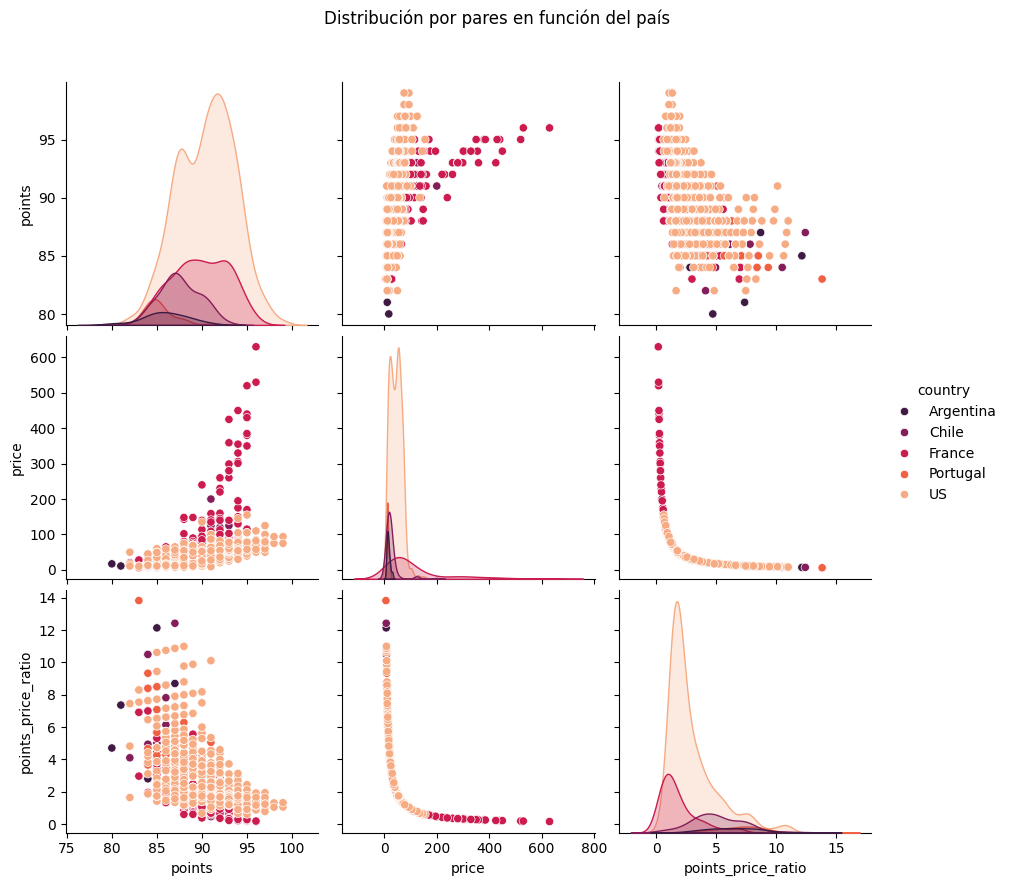

In [83]:
#TU CODIGO
sns.pairplot(p_v, hue="country", height=3, palette='rocket')
plt.subplots_adjust(top=0.9)
plt.suptitle("Distribuci√≥n por pares en funci√≥n del pa√≠s")
plt.show()

#### &#9758; Observa las distribuciones por pares en funci√≥n de la bodega.

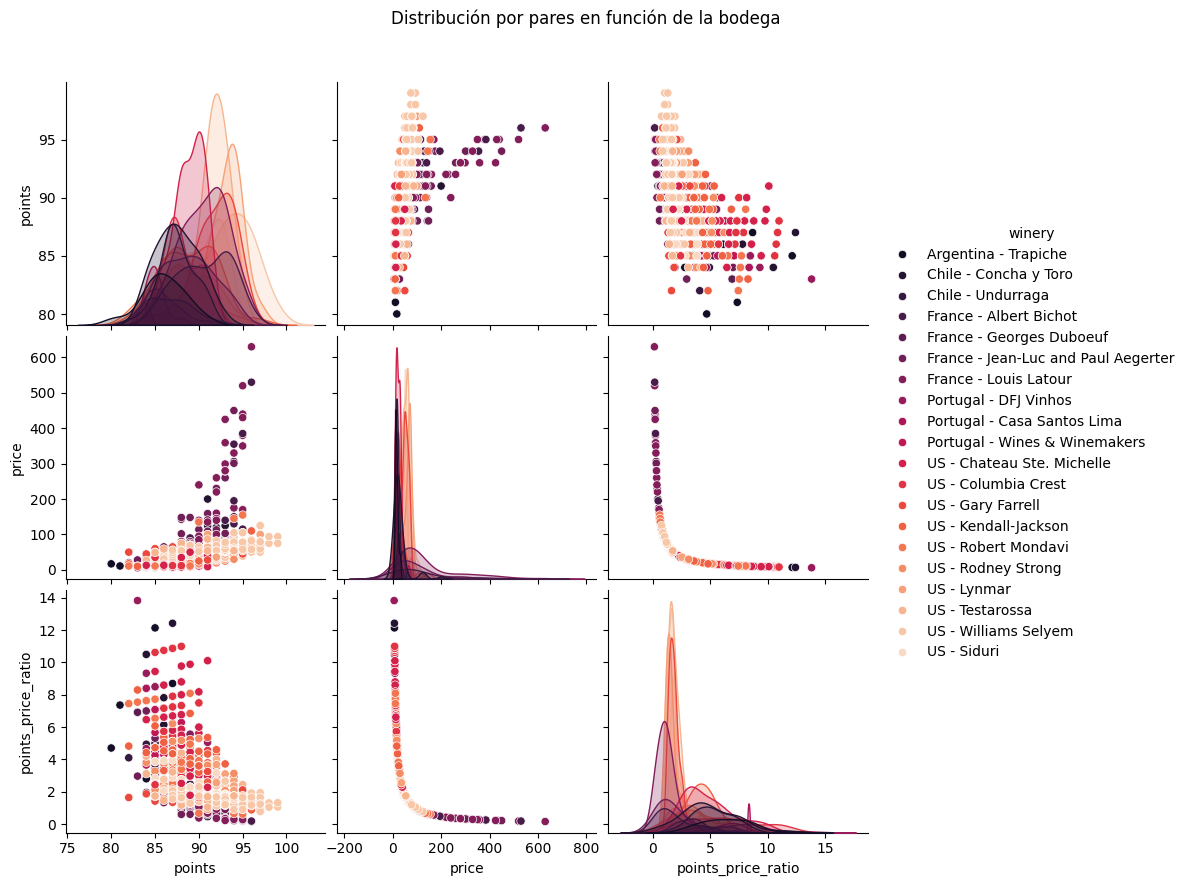

In [84]:
#TU CODIGO
sns.pairplot(p_v, hue="winery", height=3, palette='rocket')
plt.subplots_adjust(top=0.9)
plt.suptitle("Distribuci√≥n por pares en funci√≥n de la bodega")
plt.show()

#### &#9758; Observa las distribuciones (scatter) de precio por variedad de uva.

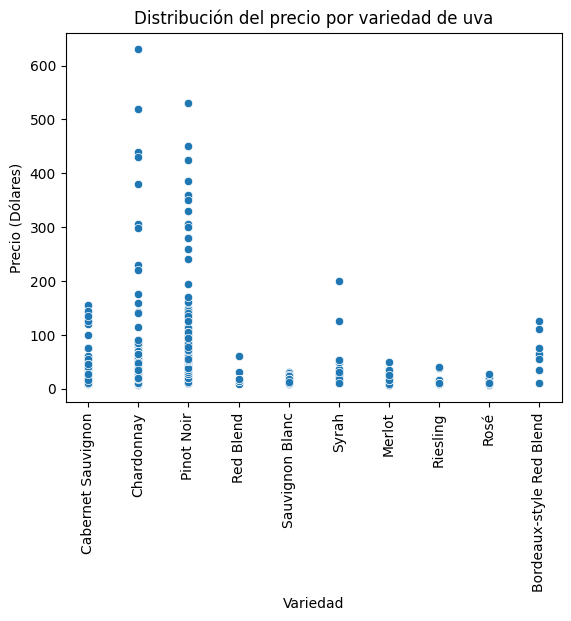

In [59]:
#TU CODIGO
sns.scatterplot(x="variety", y="price", data=p_v)
plt.title("Distribuci√≥n del precio por variedad de uva")
plt.xlabel("Variedad")
plt.ylabel("Precio (D√≥lares)")
plt.xticks(rotation=90)
plt.show()

#### &#9758; Observa las distribuciones (scatter) de precio por bodega.

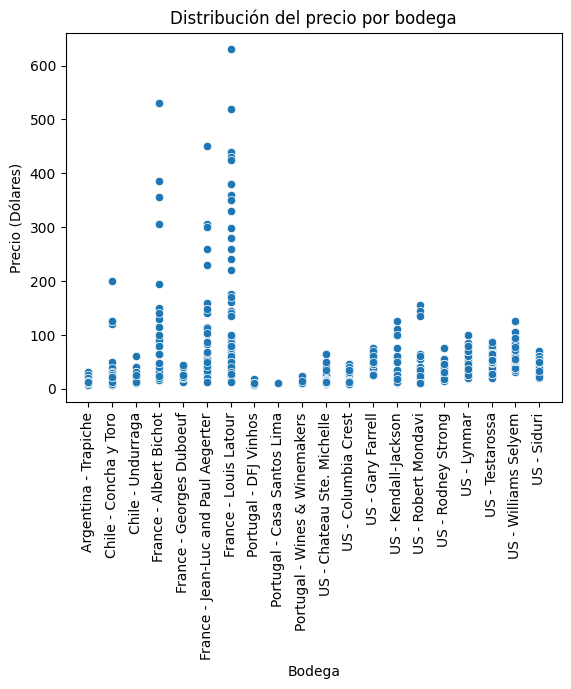

In [64]:
#TU CODIGO
sns.scatterplot(x="winery", y="price", data=p_v)
plt.title("Distribuci√≥n del precio por bodega")
plt.xlabel("Bodega")
plt.ylabel("Precio (D√≥lares)")
plt.xticks(rotation=90)
plt.show()

#### &#9758; Observa las distribuciones (scatter) de puntos/precio por bodega.

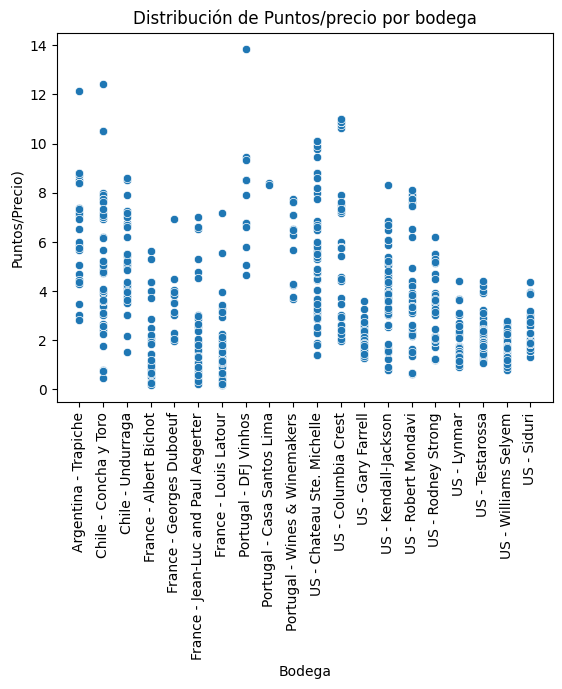

In [63]:
#TU CODIGO
sns.scatterplot(x="winery", y="points_price_ratio", data=p_v)
plt.title("Distribuci√≥n de Puntos/precio por bodega")
plt.xlabel("Bodega")
plt.ylabel("Puntos/Precio)")
plt.xticks(rotation=90)
plt.show()

#### &#9758; Observa las distribuciones (scatter) de puntos/precio por pa√≠s.

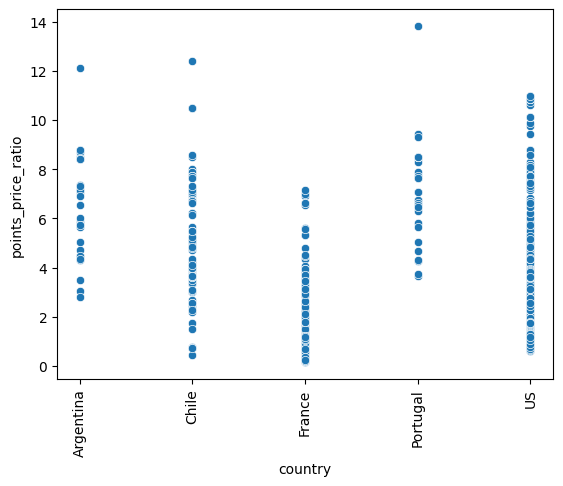

In [51]:
#TU CODIGO
sns.scatterplot(x="country", y="points_price_ratio", data=p_v)
plt.xticks(rotation=90)
plt.show()

### __Agrega los datos de M√©xico a esta √∫ltima tabla de informaci√≥n__

#### &#9758; Une la tabla de vinosMX a la tabla p_v
- Aseg√∫rate de __no agregar__ la columna de descripci√≥n

In [85]:
#TU CODIGO
df3 = pd.concat([p_v, vinosMX.drop(columns=['description'])])

#### &#9758; Calcula los valores de points/price para los vinos de M√©xico
- TIP: Usa el m√©todo apply sobre `df3[['points','price','points/price']]`

In [86]:
# TU CODIGO
df3['points_price_ratio'] = df3.apply(lambda row: row['points'] / row['price'], axis=1)

#### &#9758; Observa la relaci√≥n puntos-precio por pa√≠s

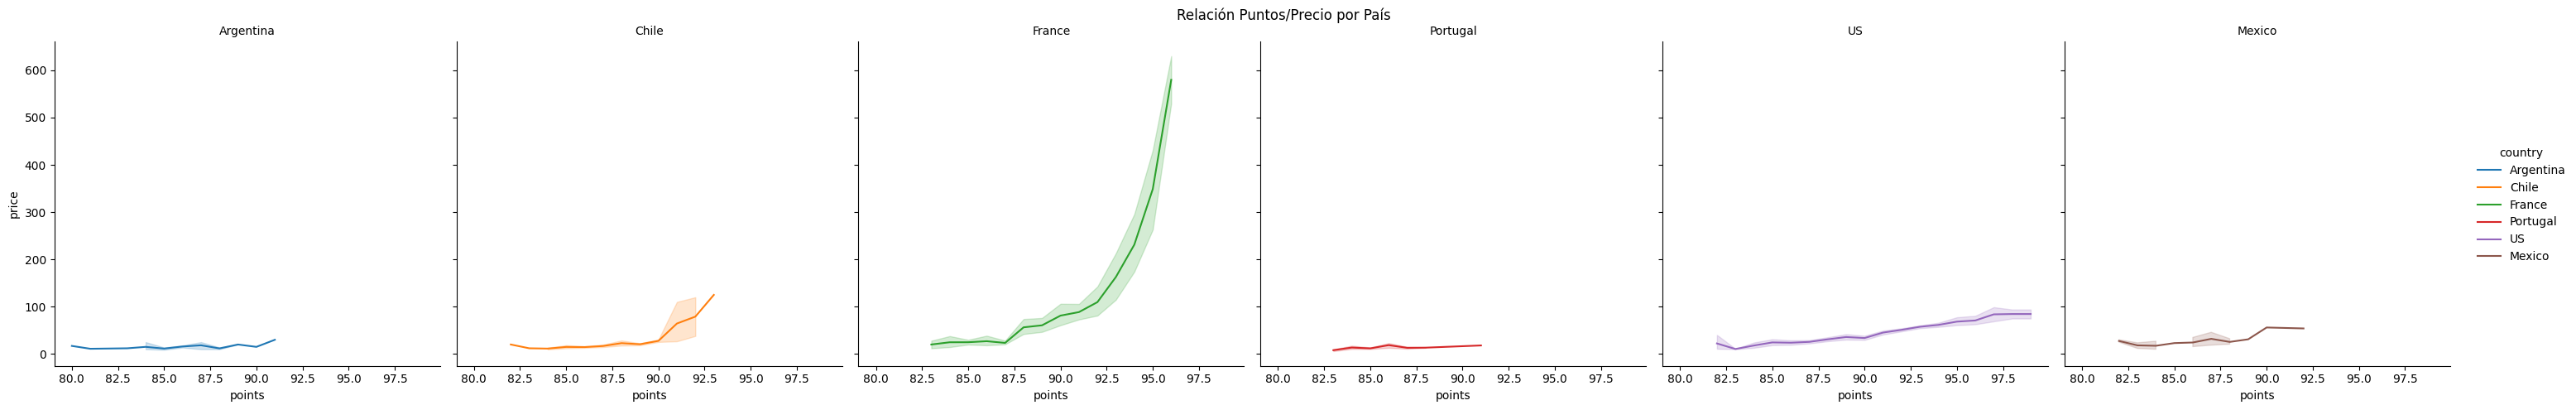

In [94]:
g = sns.relplot(x="points", y="price", hue="country", col='country',kind="line", data=df3)
g.set_titles("{col_name}")
plt.subplots_adjust(top=0.9)
plt.suptitle("Relaci√≥n Puntos/Precio por Pa√≠s")
plt.show()

#### &#9758; Observa las distribuciones por pares en funci√≥n del pa√≠s.
- Construye una tabla auxiliar "mx_top", donde los datos de M√©xico (en df3) aparezcan al final de la tabla mx_top.

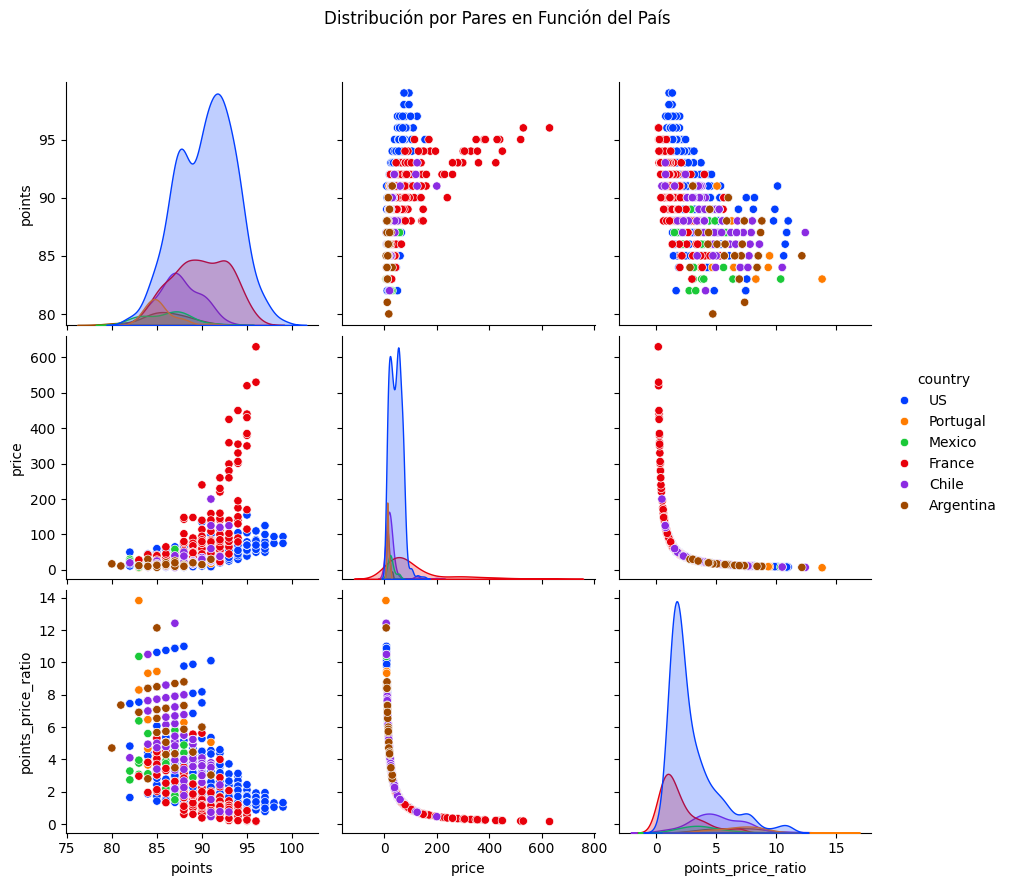

In [95]:
mx_top = df3.sort_values(by='country', ascending=False)
sns.pairplot(mx_top, hue="country", height=3, palette='bright')
plt.subplots_adjust(top=0.9)
plt.suptitle("Distribuci√≥n por Pares en Funci√≥n del Pa√≠s")
plt.show()

#### &#9758; Observa las distribuciones (scatter) de puntos por pa√≠s.

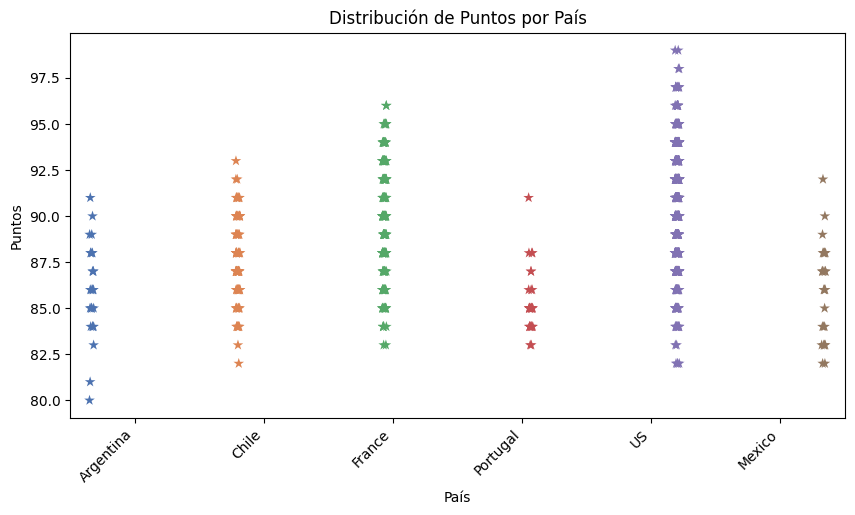

In [101]:
plt.figure(figsize=(10,5))
sns.stripplot(x="country", y="points", hue="country", data=df3, dodge=True, palette='deep', marker='*', size=8, legend=False)
plt.xticks(rotation= 45, ha="right")
plt.title("Distribuci√≥n de Puntos por Pa√≠s")
plt.xlabel("Pa√≠s")
plt.ylabel("Puntos")
plt.show()

#### &#9758; Observa las distribuciones (scatter) de precios por bodega.

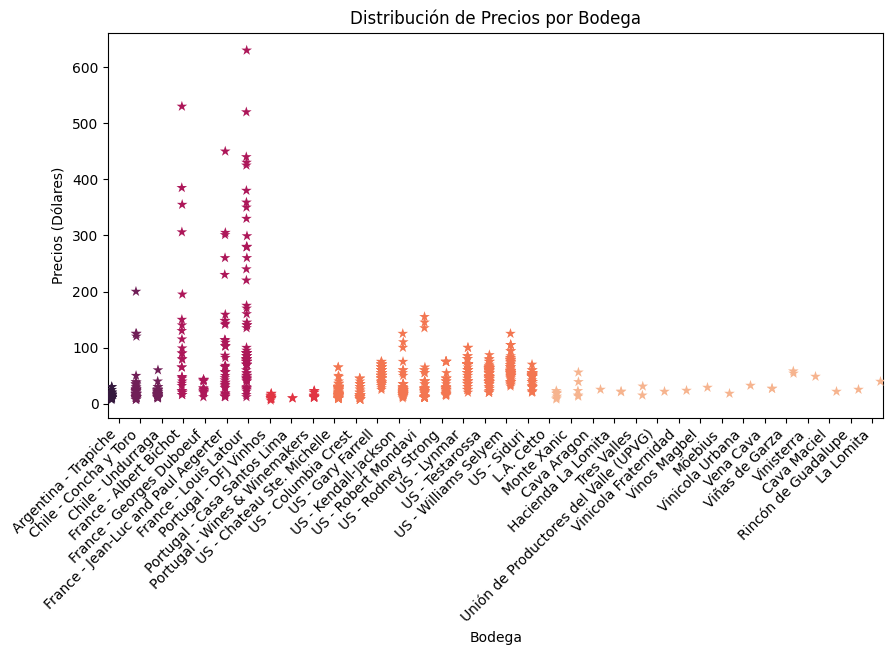

In [102]:
plt.figure(figsize=(10,5))
sns.stripplot(x="winery", y="price", hue="country", data=df3, dodge=True, palette='rocket', marker='*', size=8, legend =False)
plt.xticks(rotation= 45, ha="right")
plt.title("Distribuci√≥n de Precios por Bodega")
plt.xlabel("Bodega")
plt.ylabel("Precios (D√≥lares)")
plt.show()

#### &#9758; Observa las distribuciones (scatter) de puntos/precio por bodega.
- Dibuja una l√≠nea que marque el promedio de todos los datos
- Dibuja marcas ubicadando los valores promedio por cada bodega (TIP: usa `groupby` sobre pa√≠s y bodega para calcular primero los valores promedio)

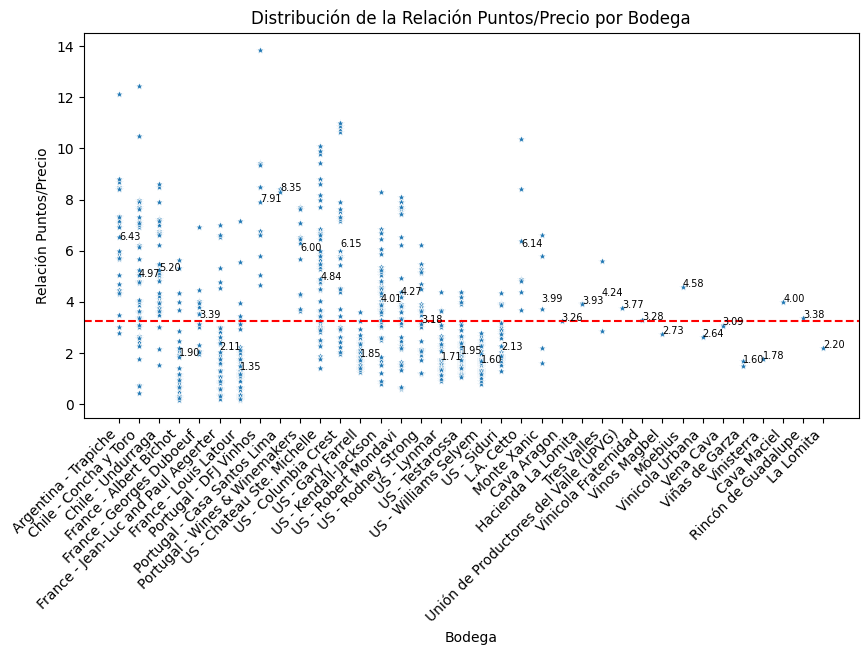

In [115]:
medias = df3.groupby('winery')['points_price_ratio'].mean().reset_index()
plt.figure(figsize=(10,5))
sns.scatterplot(x="winery", y="points_price_ratio", data=df3, marker='*')
plt.axhline(df3['points_price_ratio'].mean(), color='red', linestyle='--')
for index, row in medias.iterrows():
    plt.text(row['winery'], row['points_price_ratio'], f"{row['points_price_ratio']:.2f}", color='black', size=7)
plt.title("Distribuci√≥n de la Relaci√≥n Puntos/Precio por Bodega")
plt.xlabel("Bodega")
plt.ylabel("Relaci√≥n Puntos/Precio")
plt.xticks(rotation=45, ha="right")
plt.show()


#### &#9758; Si consideramos la proporci√≥n de los pa√≠ses con mejor relaci√≥n puntos/precio, ¬øc√≥mo queda M√©xico?
- Usa un gr√°fico de pastel

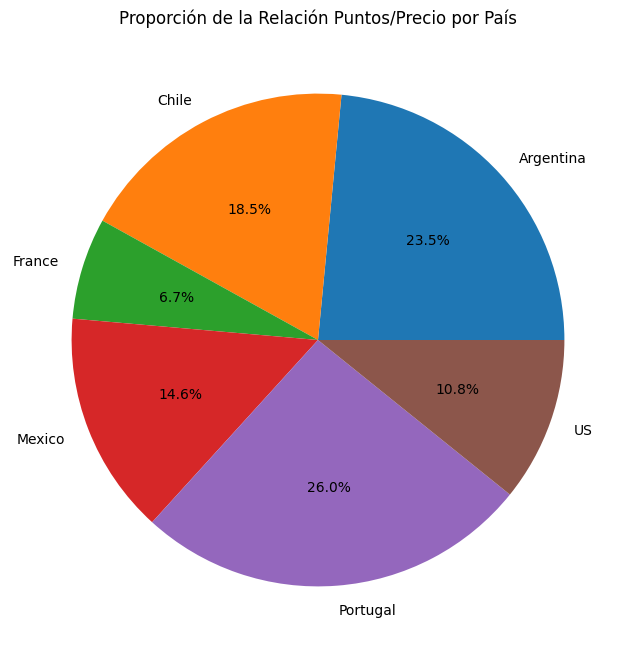

In [93]:
# TU CODIGO
proporcion_paises = df3.groupby('country')['points_price_ratio'].mean().reset_index()
plt.figure(figsize=(8,8))
plt.pie(proporcion_paises['points_price_ratio'], labels=proporcion_paises['country'], autopct='%1.1f%%')
plt.title('Proporci√≥n de la Relaci√≥n Puntos/Precio por Pa√≠s')
plt.show()